In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

In [2]:
def get_iris_df():
  ds = sklearn.datasets.load_iris()
  df = pd.DataFrame(ds['data'], columns=ds['feature_names'])
  code_species_map = dict(zip(range(3), ds['target_names']))
  df['species'] = [code_species_map[c] for c in ds['target']]
  return df

In [3]:
df = get_iris_df()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


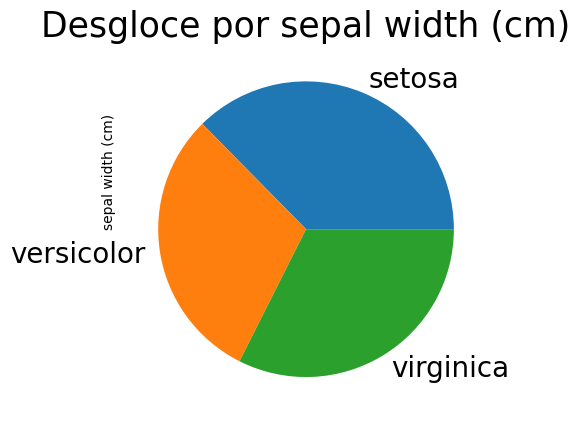

In [4]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title('Desgloce por '+ var, fontsize=25)
plt.show()

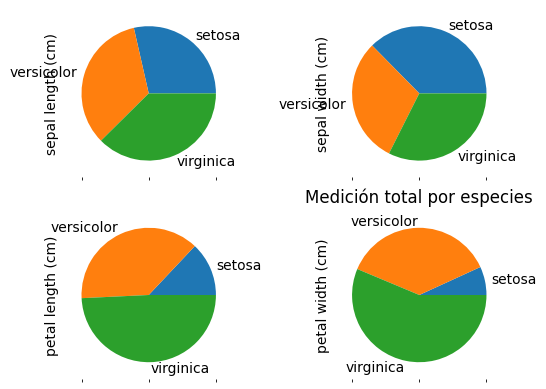

In [5]:
sum_by_species = df.groupby('species').sum()
sum_by_species.plot(kind='pie', subplots=True, layout=(2,2), legend=False)
plt.title('Medición total por especies')
plt.show()

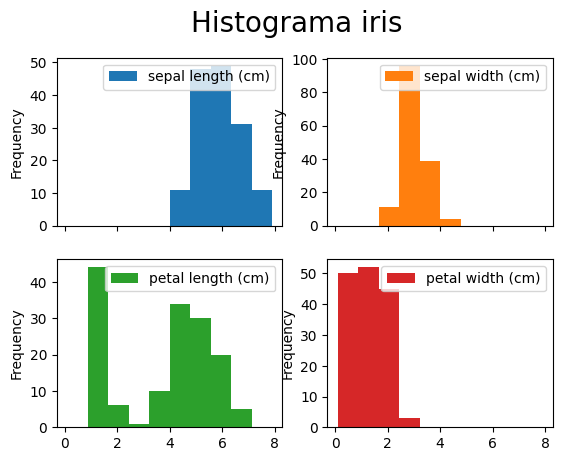

In [6]:
df.plot(kind='hist', subplots=True, layout=[2,2])
plt.suptitle('Histograma iris', fontsize=20)
plt.show()

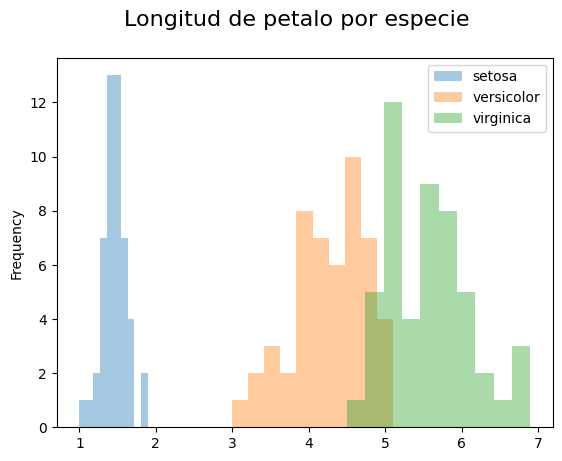

In [9]:
for spec in df['species'].unique():
    forspec = df[df['species'] == spec]
    forspec['petal length (cm)'].plot(kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')
plt.suptitle('Longitud de petalo por especie', fontsize=16)
plt.show()

In [10]:
col = df['petal length (cm)']
promedio = col.mean()
std = col.std()
# mediana = col.median()
mediana = col.quantile(0.5)
percentil25 = col.quantile(0.25) # Cuartil 1
percentil75 = col.quantile(0.75) # Cuartil 3
media_limpia = col[(col>percentil25) & (col< percentil75)].mean()